In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer #Term Frequency Inverse Document Frequency
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


#For testing how well this method words, we will gather products from 3 categories. These
#categories are, Muffins, Bread and Cookies. Thus, we can expect k = 3. 

products = ['Thomas Original Nooks and Crannies English Muffins',
        "Jiffy Corn Muffin Mix",
        "Bakery Fresh Goodness Blueberry Muffins",
        "Blueberry Muffin Mix",
        "Honey Muffin Mix",
        "Thomas' Light Multigrain English Muffins",
        "Bakery Fresh Goodness Lemon Poppyseed Muffins",
            
        'Kroger® Round Top White Bread',
        'Kroger® Enriched White Sandwich Bread',
        'Natures Own Honey Wheat Bread',
        'Oroweat Country White Bread',
        'Western Hearth 12 Grain Bread',
        "Wonder Classic White Bread"
        'Daves Killer Bread 21 Whole Grains',
        "Oroweat 100% Whole Wheat Bread",
        "Cinnamon Swirl Bread",
        "p$$t... White Bread",
        "Nature's Own 100% Whole Wheat Bread",
        "Van De Kamp's Tender Twist Sandwich Bread",
        
        "CHIPS AHOY! Chewy Chocolate Chip Cookies",
        "Keebler Chips Deluxe Rainbow Cookies",
        "Pepperidge Farm Milano Milk Chocolate Cookies",
        "Bakery Fresh Goodness Chocolate Chip Cookies",
        "Chocolate Chip Cookie Dough"]


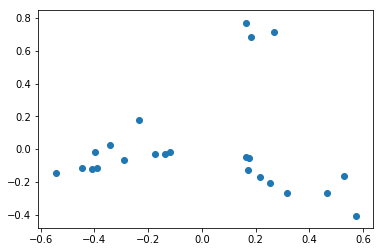

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


#first we will need to represent our product names as vectors. 
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
Y = pipeline.fit_transform(products).todense()


#converting our multidimensional data into 2D so we can plot and visualize what we are working with.
pca = PCA(n_components=2).fit(Y)
data2D = pca.transform(Y)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()          

We can clearly see the three groups that are within our data. Muffins, Bread, Cookies.
We can double check by plotting the center of those groups. 

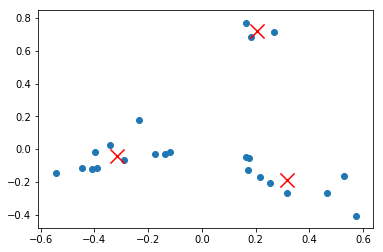

In [22]:
#Plotting the centers of our groups
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(Y)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.scatter(data2D[:,0], data2D[:,1])
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')

plt.show() 

In [23]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(products)

#We know true_k =3 from our plots above
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 bread
 white
 wheat
 oroweat
 100
 kroger
 sandwich
 muffins
 cinnamon
 swirl
Cluster 1:
 mix
 muffin
 blueberry
 muffins
 honey
 jiffy
 corn
 light
 multigrain
 fresh
Cluster 2:
 chocolate
 chip
 cookies
 dough
 cookie
 chewy
 ahoy
 farm
 pepperidge
 milano


In [25]:
print("\n")
print("Prediction")

Y = vectorizer.transform(["caramel cookies"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["rasberry muffin"])
prediction = model.predict(Y)
print(prediction)



Prediction
[2]
[1]
